In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('exoplanet_archive.csv')

In [68]:
df.head()

,loc_rowid,pl_name,hostname,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,pl_orbper,pl_orbpererr1,...,st_rotperr1,st_rotperr2,st_rotplim,st_radv,st_radverr1,st_radverr2,st_radvlim,sy_dist,sy_disterr1,sy_disterr2
0,1,11 Com b,11 Com,2,1,0,0,Radial Velocity,323.21000,0.06000,...,NaN,NaN,NaN,43.37,0.21,-0.21,0.0,93.1846,1.9238,-1.9238
1,2,11 UMi b,11 UMi,1,1,0,0,Radial Velocity,516.21997,3.20000,...,NaN,NaN,NaN,-17.52,0.15,-0.15,0.0,125.3210,1.9765,-1.9765
2,3,14 And b,14 And,1,1,0,0,Radial Velocity,186.76000,0.11000,...,NaN,NaN,NaN,-59.73,0.31,-0.31,0.0,75.4392,0.7140,-0.7140
3,4,14 Her b,14 Her,1,2,0,0,Radial Velocity,1765.03890,1.67709,...,NaN,NaN,NaN,-13.82,0.00,0.00,0.0,17.9323,0.0073,-0.0073
4,5,16 Cyg B b,16 Cyg B,3,1,0,0,Radial Velocity,798.50000,1.00000,...,NaN,NaN,NaN,-28.10,0.10,-0.10,0.0,21.1397,0.0110,-0.0111


In [69]:
df.columns

Index(['loc_rowid', 'pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'sy_mnum',
       'cb_flag', 'discoverymethod', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_angsep', 'pl_angseperr1',
       'pl_angseperr2', 'pl_angseplim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_dens', 'pl_denserr1',
       'pl_denserr2', 'pl_denslim', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_tranmid', 'pl_tranmiderr1',
       'pl_tranmiderr2', 'pl_tranmidlim', 'pl_trandur', 'pl_trandurerr1',
       'pl_trandurerr2', 'pl_trandurlim', 'pl_ratror', 'pl_ratrorerr1',
       'pl_ratrorerr2', 'pl_ratrorlim', 'pl_trueobliq', 'pl_trueobliqerr1',
       'pl_trueobliqerr2', 'pl_trueobliqlim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
  

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678 entries, 0 to 5677
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_rowid         5678 non-null   int64  
 1   pl_name           5678 non-null   object 
 2   hostname          5678 non-null   object 
 3   sy_snum           5678 non-null   int64  
 4   sy_pnum           5678 non-null   int64  
 5   sy_mnum           5678 non-null   int64  
 6   cb_flag           5678 non-null   int64  
 7   discoverymethod   5678 non-null   object 
 8   pl_orbper         5405 non-null   float64
 9   pl_orbpererr1     4908 non-null   float64
 10  pl_orbpererr2     4908 non-null   float64
 11  pl_orbperlim      5405 non-null   float64
 12  pl_orbsmax        5387 non-null   float64
 13  pl_orbsmaxerr1    2771 non-null   float64
 14  pl_orbsmaxerr2    2771 non-null   float64
 15  pl_orbsmaxlim     5388 non-null   float64
 16  pl_angsep         5359 non-null   float64


In [71]:
# drop rows where the orbital period is NaN
df = df.dropna(subset=['pl_orbper'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5405 entries, 0 to 5677
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loc_rowid         5405 non-null   int64  
 1   pl_name           5405 non-null   object 
 2   hostname          5405 non-null   object 
 3   sy_snum           5405 non-null   int64  
 4   sy_pnum           5405 non-null   int64  
 5   sy_mnum           5405 non-null   int64  
 6   cb_flag           5405 non-null   int64  
 7   discoverymethod   5405 non-null   object 
 8   pl_orbper         5405 non-null   float64
 9   pl_orbpererr1     4908 non-null   float64
 10  pl_orbpererr2     4908 non-null   float64
 11  pl_orbperlim      5405 non-null   float64
 12  pl_orbsmax        5118 non-null   float64
 13  pl_orbsmaxerr1    2532 non-null   float64
 14  pl_orbsmaxerr2    2532 non-null   float64
 15  pl_orbsmaxlim     5118 non-null   float64
 16  pl_angsep         5096 non-null   float64
 17  

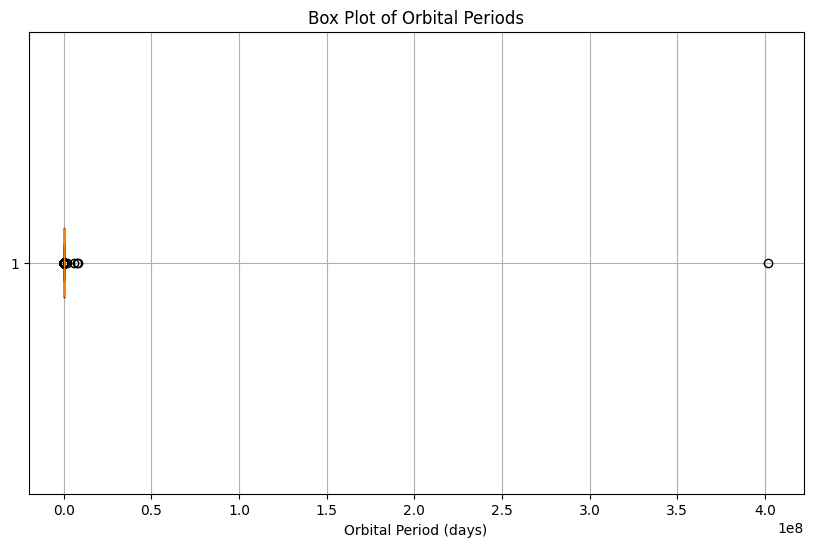

In [73]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['pl_orbper'].dropna(), vert=False)
plt.title('Box Plot of Orbital Periods')
plt.xlabel('Orbital Period (days)')
plt.grid(True)
plt.show()


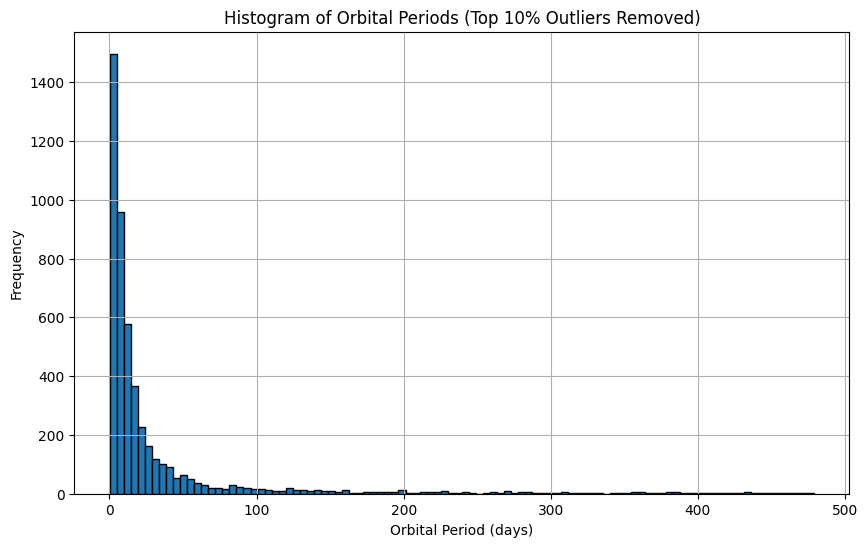

In [74]:
# Remove the top 10% outliers
threshold = df['pl_orbper'].quantile(0.90)
data_filtered_90 = df[df['pl_orbper'] <= threshold]

# Plot the histogram with the top 10% outliers removed
plt.figure(figsize=(10, 6))
plt.hist(data_filtered_90['pl_orbper'].dropna(), bins=100, edgecolor='black')
plt.title('Histogram of Orbital Periods (Top 10% Outliers Removed)')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


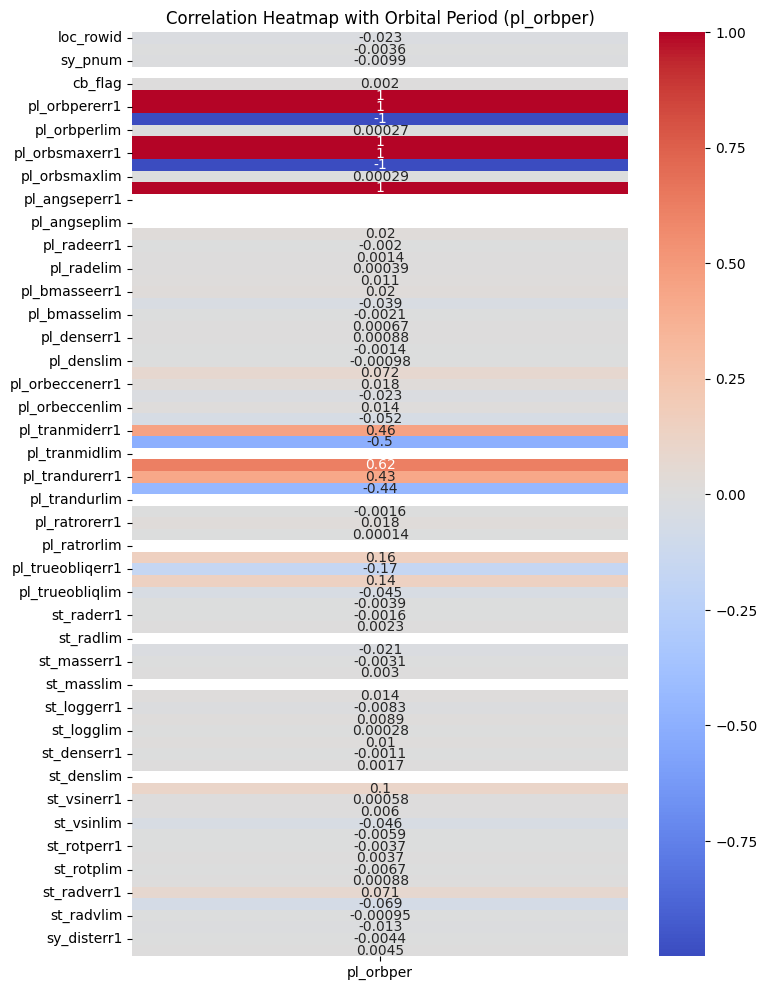

In [75]:
numeric_columns = df.select_dtypes(include=np.number).columns
matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(matrix[['pl_orbper']], annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Orbital Period (pl_orbper)')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
features = ['pl_tranmid']
target = 'pl_orbsmax'  # Semi-major axis (orbital radius)

# Drop rows with missing target or features
data_model = df.dropna(subset=features + [target])

# Split data into features and target
X = data_model[features]
y = data_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=50)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2

c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.9281217877402785, -0.09879557826981955)

In [77]:
# Define a simplified parameter grid
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
best_rmse = mean_squared_error(y_test, y_pred, squared=False)
best_r2 = r2_score(y_test, y_pred)

best_params, best_rmse, best_r2


Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


({'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.9148237564529391,
 -0.0675342936521739)